In [49]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [50]:
## defining the paths of the image datasets
clean_train_path = './images/train/clean'
messy_train_path = './images/train/messy'
clean_test_path = './images/val/clean'
messy_test_path = './images/val/messy'
final_path = './images/test'
image_size = 128

In [86]:
## counting the number of different datas
clean_train_cnt =0
messy_train_cnt = 0
clean_test_cnt =0
messy_test_cnt =0
for image in os.listdir(clean_train_path):
    clean_train_cnt+=1
for image in os.listdir(messy_train_path):
    messy_train_cnt +=1

for image in os.listdir(clean_test_path):
    clean_test_cnt+=1
for image in os.listdir(messy_test_path):
    messy_test_cnt+=1

print("No of clean rooms in train dataset : ", clean_train_cnt)
print("No of messy rooms in train dataset : ", messy_train_cnt)
print("No of clean rooms in test dataset : ", clean_test_cnt)
print("No of messy rooms in test dataset : ", messy_test_cnt)

No of clean rooms in train dataset :  96
No of messy rooms in train dataset :  96
No of clean rooms in test dataset :  10
No of messy rooms in test dataset :  10


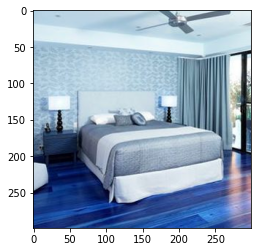

In [52]:
## printing a random image
idx = os.listdir(clean_train_path)[0]

path = os.path.join(clean_train_path,idx)

arr = np.array(cv2.imread(path))

plt.imshow(arr)

In [53]:
## preparing train data
def train_data():
    clean_train_data = []
    messy_train_data = []
    for image in os.listdir(clean_train_path):
        path = os.path.join(clean_train_path,image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (image_size,image_size)).flatten()
        clean_train_data.append(img)

    for image in os.listdir(messy_train_path):
        path = os.path.join(messy_train_path,image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (image_size,image_size)).flatten()
        messy_train_data.append(img)

    X_train_data = np.concatenate((np.asarray(messy_train_data),np.asarray(clean_train_data)), axis =0)
    X_train_data = (X_train_data - np.min(X_train_data))/(np.max(X_train_data) - np.mean(X_train_data))
    y_clean = np.ones(clean_train_cnt)
    y_messy = np.zeros(messy_train_cnt)
    y_train_data = np.concatenate((np.asarray(y_messy),np.asarray(y_clean)),axis=0)

    return X_train_data, y_train_data

In [54]:
## loading train data
X_train_data, y_train_data = train_data()

In [55]:
X_train_data.shape, y_train_data.shape

((192, 16384), (192,))

In [56]:
## preparing test data
def test_data():
    clean_test_data = []
    messy_test_data = []
    for image in os.listdir(clean_test_path):
        path = os.path.join(clean_test_path,image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (image_size,image_size)).flatten()
        clean_test_data.append(img)

    for image in os.listdir(messy_test_path):
        path = os.path.join(messy_test_path,image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (image_size,image_size)).flatten()
        messy_test_data.append(img)

    X_test_data = np.concatenate((np.asarray(clean_test_data),np.asarray(messy_test_data)), axis =0)
    X_test_data = (X_test_data - np.min(X_test_data))/(np.max(X_test_data) - np.min(X_test_data))
    y_clean = np.ones(clean_test_cnt)
    y_messy = np.zeros(messy_test_cnt)
    y_test_data = np.concatenate((np.asarray(y_clean),np.asarray(y_messy)),axis=0)

    return X_test_data, y_test_data

In [57]:
## loading test data
X_test_data, y_test_data = test_data()

In [58]:
X_test_data.shape , y_test_data.shape

((20, 16384), (20,))

In [59]:
X = np.concatenate((X_train_data,X_test_data), axis=0)
X.shape

(212, 16384)

In [60]:
y = np.concatenate((y_train_data,y_test_data), axis=0)
y.shape

(212,)

In [61]:
X = (X - np.mean(X))/(np.std(X))    ## mean normalization

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33,random_state = 42)

In [63]:
X_train.shape, y_train.shape

((142, 16384), (142,))

In [64]:
class NN:
    def __init__(self,layers=1,iters=10,lamda=2,lr = 0.1):
        self._layers = layers    ## no of layers in the model
        self._iters = iters      ## no of iterations or epochs
        self._lamda = lamda      ## regularization factor lambda
        self._lr =lr             ## learning rate alpha
    
    def fit(self , X , y):
        self._X = np.array(X)
        self._y= np.array(y)
        self._n =len(X[0]);      ## no of features
        self._m = len(X);        ## no of data in the dataset
        self._units = self._n//100  ## no of neurons in each layer
                                    ## you can change the 100 depending upon the dataset
        
        self._THETA = []
        ## Initialising theta with random values with eman zero and standard deviation 1
        
        theta = np.random.normal(loc =0, scale = 1 ,size = (self._units, self._n+1))
        self._THETA.append(theta)
        
        for i in range(self._layers -1):
            #theta = np.random.randint(-2,2,(self._n, self._n +1))
            theta = np.random.normal(loc =0, scale = 1 ,size = (self._units, self._units+1))
            #theta = np.random.randn(self._n, self._n +1)*np.sqrt(2/self._n)
            self._THETA.append(theta)
        
        theta = np.random.normal(loc = 0, scale = 1, size = (1,self._units +1))
        #theta = np.random.randn(self._n, self._n +1) * np.sqrt(2/self._n)
        self._THETA.append(theta)
        
        
        errors = []
        for i in range(self._iters):
            
            ## Initialising deltas with zero
            DELTA = []
            d = np.zeros(self._THETA[0].shape)
            DELTA.append(d)
            for layer in range(self._layers -1):
                d = np.zeros(self._THETA[layer+1].shape)
                DELTA.append(d)
            d = np.zeros(self._THETA[self._layers].shape)
            DELTA.append(d)
            
            
            for j in range(self._m):
                 
                ## forward propagation
                A = []
                a = self._X[j]
                y_now = self._y[j].reshape(-1,1)
                a = a.reshape(-1,1)
                ex = [1]
                a = np.vstack((ex,a))
                A.append(a)
                for layer in range(self._layers):
                    theta = self._THETA[layer]
                    a = self.forward_propagation(a,theta)
                    
                    ex = [1]
                    a = np.vstack((ex,a))   
                    A.append(a)
                
                a = self.forward_propagation(a,self._THETA[self._layers])
                A.append(a)
                
                
                
                ## backward propagation
                delta = [];
                some = A[self._layers +1] - y_now
                delta.append(some)
                
                for layer in range(self._layers,0,-1):
                    some = np.dot(self._THETA[layer].T , delta[len(delta)-1])
                    temp = 1 - A[layer]
                    some2 = np.multiply(A[layer],temp)
                    ans = np.multiply(some,some2)
                    delta.append(ans[1:])
                
                delta.reverse()
                
                for layer in range(self._layers +1):
                    DELTA[layer] = DELTA[layer] + np.dot(delta[layer],A[layer].T)
            

            ## summing up deltas for every data in the dataset
            for layer in range(self._layers +1):
                    for j in range(len(DELTA[layer])):
                        for k in range(len(DELTA[layer][j])):
                            if(k==0):
                                DELTA[layer][j][k] = DELTA[layer][j][k]/(self._m)
                            else:
                                DELTA[layer][j][k] = DELTA[layer][j][k]/(self._m) + self._lamda*self._THETA[layer][j][k]
            
            print(i)
            
            ## gradient descend
            for layer in range(self._layers +1):
                self._THETA[layer] = self._THETA[layer] - self._lr*DELTA[layer]
                
            errors.append(self.error(self._X,self._y))
        
        self.errors = errors
                
    def forward_propagation(self,a,theta):
        some = np.dot(theta,a)
        some = np.clip(some,-500,500)
        return 1/(1+np.exp(-some))

    
    ## function to predict y given values of X
    def predict(self,X):
        ans = []
        m = len(X)
        for i in range(m):
            a = X[i]
            a = a.reshape(-1,1)
            ex = [1]
            a = np.vstack((ex,a))
            for layer in range(self._layers):
                theta = self._THETA[layer]
                a = self.forward_propagation(a,theta)
                ex = [1]
                a = np.vstack((ex,a))
            
            a = self.forward_propagation(a,self._THETA[self._layers])
            val = a[0]
            if(val>=0.5):
                ans.append(1)
            else:
                ans.append(0)
                
        final = np.array(ans)
        return final
    
    
    ## function to calculate accuracy
    def score(self,X,y):
        hypo = self.predict(X)
        cnt=0
        for i in range(len(hypo)):
            if hypo[i]>=0.5 and y[i]==1:
                cnt+=1
            elif hypo[i]<0.5 and y[i]==0:
                cnt+=1
        
        return cnt/len(y)
            
    
    ## function to calculate error
    def error(self,X,y):
        hypo = self.predict(X)
        fir =0 
        for i in range(len(y)):
            fir += y[i]*np.log(hypo[i] + 1e-10) + (1-y[i])*np.log(1 - hypo[i] + 1e-10)
        
        fir = -fir/len(y)
        
        sec = 0;
        for i in range(len(self._THETA)):
            theta = self._THETA[i]
            sec += sum(sum(theta**2))
        sec = (sec* self._lamda)/(2*len(y))
        err = fir + sec
        return err
      

In [119]:
# 1, 40, 1.6, 0.06
model = NN(1,40,1.7,0.05)

In [120]:
X_train.shape

(142, 16384)

In [121]:
model.fit(X_train,y_train)
print("completed")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
completed


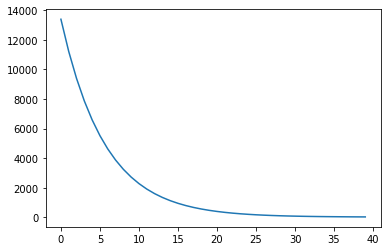

In [122]:
plt.plot(model.errors)

In [123]:
model.score(X_test,y_test)

0.7285714285714285

In [124]:
model.score(X_train,y_train)

0.7323943661971831

In [125]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

In [126]:
y_test

array([0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0.])